# Unsupervised analysis of days of week
Treating crossings each day as features to learn about the relationships between various days

In [1]:
from jupyterworkflow.data import get_fremont_data
import os
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.mixture import GMM
from sklearn.decomposition import PCA

## Get data

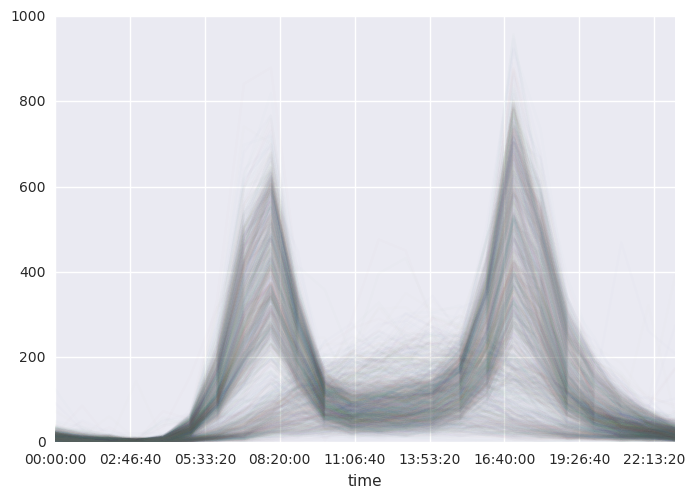

In [2]:
data = get_fremont_data()
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

In [3]:
pivoted.T.shape

(1610, 24)

## PCA analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

In [5]:
X2 = PCA(2).fit_transform(X)

In [6]:
X2.shape

(1610, 2)

## Unsupervised clustering

In [7]:
gmm = GMM(2)
gmm.fit(X2)
labels = gmm.predict(X2)
labels

array([0, 0, 0, ..., 1, 1, 0])

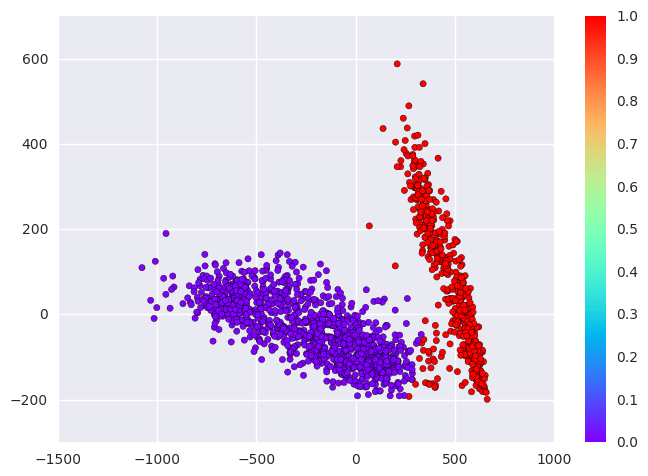

In [8]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

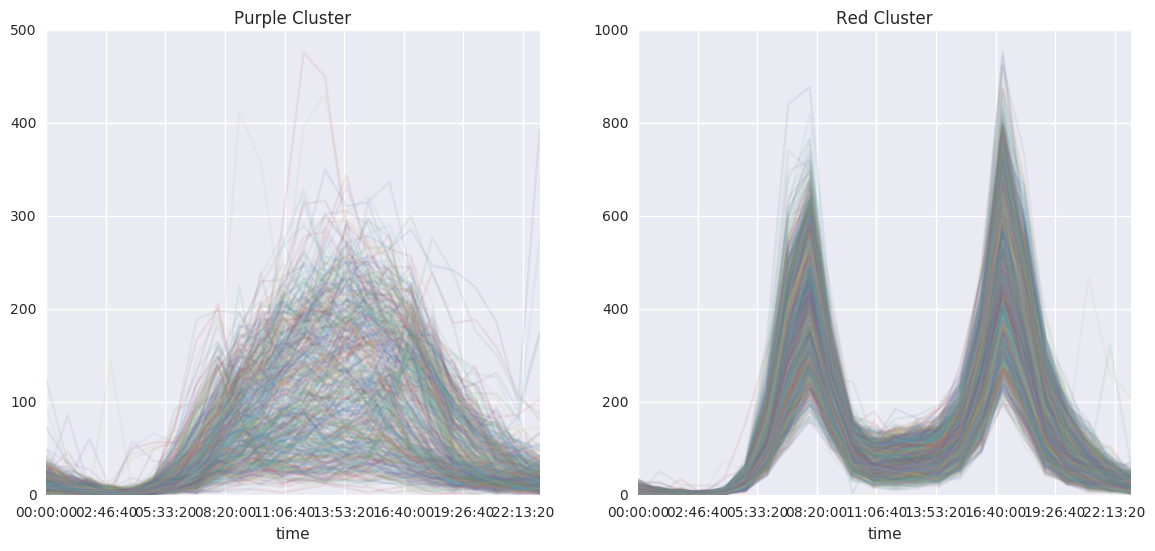

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14, 6))

pivoted.T[labels == 1].T.plot(legend=False,alpha=0.1, ax=ax[0])
pivoted.T[labels == 0].T.plot(legend=False,alpha=0.1, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with day of week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

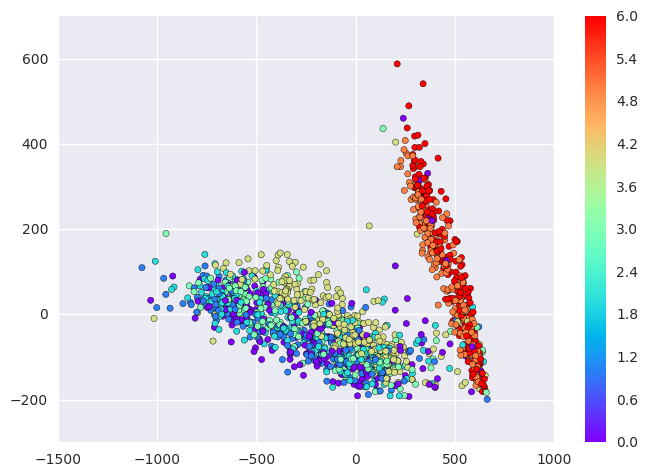

In [11]:
plt.scatter(X2[:,0],X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analysing outliers
The following are weekdays that look like a holiday, feb 2 - 2017 was a snowstorm

In [13]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-19', '2012-11-21', '2012-11-22', '2012-11-23',
               '2012-12-19', '2012-12-20', '2012-12-21', '2012-12-24',
               '2012-12-25', '2012-12-26', '2012-12-27', '2012-12-28',
               '2012-12-31', '2013-01-01', '2013-01-21', '2013-02-18',
               '2013-02-22', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-25', '2013-12-26',
               '2013-12-27', '2013-12-31', '2014-01-01', '2014-02-17',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-31', '2015-01-01', '2015-01-02',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-21', '2015-12-23',
               '2015-12-24', '2015-12-25', '2015-12-28', '2015-12-31',
      